# Figsetup
Using chou 20210513 unsort data. <br>
shortcaption: A reconstructed kernel from SVD compared with the original kernel<br>
label: real_STK_SVD

In [1]:
filename = 'real_STK_SVD'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.io import loadmat
import pandas as pd
import os
%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["mathtext.fontset"] = "cm"

In [3]:
def NGD2L_TK_AS(T, epsilon, gamma, omegastar, deltastar, tau_y, Dmp):
    dt = np.mean(np.diff(T))
    dt = dt/50
    T = np.arange(0, T[-1]+dt, dt)
    x = T/tau_y /tau_y *np.exp(-T/tau_y)*dt
    
    Kw = -Dmp*( 1/np.cos(deltastar)*np.exp(-epsilon*T)*np.cos(T*omegastar+deltastar) -np.exp(-gamma*T) )
    w = np.convolve(x, Kw, 'full')[:len(T):50]*dt
    return w/(dt)

# load files 

In [4]:
BS = loadmat('D:\\GoogleDrive\\retina\\oled_boundary_set', squeeze_me =True)

exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210513\\'
direction = 'UD'

SVDnSTK = loadmat(exp_folder+'Analyzed_data\\30Hz_27_RF_15min_re\\unsort\\STK.mat'
                  , squeeze_me =True)
RFprop  = loadmat(exp_folder+'Analyzed_data\\30Hz_27_RF_15min_re\\unsort\\RF_properties.mat'
                  , squeeze_me =True)

loadfiles = np.load(exp_folder+'\\Analyzed_data\\fitNGD2LASpara.npz', allow_pickle=True)

In [5]:
r = RFprop['RF_properties']['radius']

RFprop = RFprop['RF_properties']

STK = SVDnSTK['gauss_RF']

cn = 9

In [6]:
centerx = (RFprop['X_Coor'][cn-1]-BS['leftx_bd'])/(BS['rightx_bd']-BS['leftx_bd'])*27-0.5
centery = (RFprop['Y_Coor'][cn-1]-BS['lefty_bd'])/(BS['righty_bd']-BS['lefty_bd'])*27-0.5

In [7]:
dt=1/60 #large dt will cause  overflow
nstep = int(1./dt)
TKtaxis = np.arange(nstep)*dt
for k in loadfiles.files:
    vars()[k] = loadfiles[k][()]
TKAS = NGD2L_TK_AS(TKtaxis, *pd.DataFrame(para_dict).loc[cn-1][:-1])

# SVD

In [8]:
rSTK = STK[:,:,:,cn-1].reshape((30,-1))
U,sigma,VT=np.linalg.svd(rSTK)

In [9]:
sigma/np.sum(sigma)

array([0.22944418, 0.04817011, 0.04382572, 0.04151995, 0.04055945,
       0.03855857, 0.03662413, 0.03300797, 0.03194516, 0.03164128,
       0.03057829, 0.03000371, 0.02937093, 0.0287208 , 0.02563969,
       0.02403461, 0.0237151 , 0.0233698 , 0.02218172, 0.02178813,
       0.01984652, 0.01918845, 0.01892579, 0.01715001, 0.01642189,
       0.01607936, 0.01553033, 0.01477941, 0.01450959, 0.01286938])

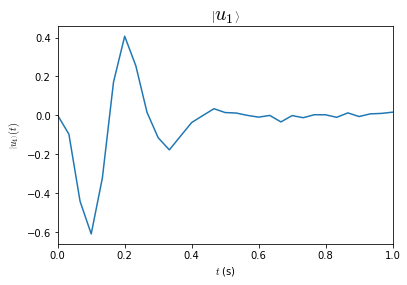

In [10]:
plt.plot(np.arange(31)*(1/30), np.append(0,U[:,0]))
plt.xlabel(r'$t$ (s)')
plt.ylabel(r'$\left| u_1 \right\rangle(t)$')
plt.title(r'$\left| u_1 \right\rangle$', fontsize=20)
plt.xlim([0,1])
# plt.gcf().set_size_inches(3,1.5)
plt.gcf().savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\R\\u1.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)

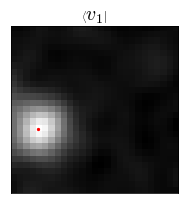

In [11]:
plt.imshow( VT[0,:].reshape((27,27)) , cmap='gray')
plt.title(r'$\left\langle {v_1} \right|$', fontsize=20)
plt.scatter(centerx,centery, c = 'r', s = 5)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.gcf().set_size_inches(3,3.5)
plt.gcf().savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\R\\v1.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)

# STK vs SVD1STK

In [12]:
T_title = '0 ms'
for i in range(8):
    T_title += ('                 '+str(-1*np.round((i+1)/30, 3))+' ms')

In [13]:
T_title

'0 ms                 -0.033 ms                 -0.067 ms                 -0.1 ms                 -0.133 ms                 -0.167 ms                 -0.2 ms                 -0.233 ms                 -0.267 ms'

In [14]:
SVDtogather =VT[0,:].reshape((27,27))* U[0,0]
STKtogather = STK[0,:,:,cn-1]
for i in np.arange(1,9):
    SVDtogather = np.hstack((SVDtogather, VT[0,:].reshape((27,27)) * U[i,0] ))
    STKtogather = np.hstack((STKtogather, STK[i,:,:,cn-1] ))
Togather = np.vstack((STKtogather, SVDtogather))
imshowdict = {'cmap': 'gray',
              'vmin': np.min(Togather),
              'vmax': np.max(Togather)}

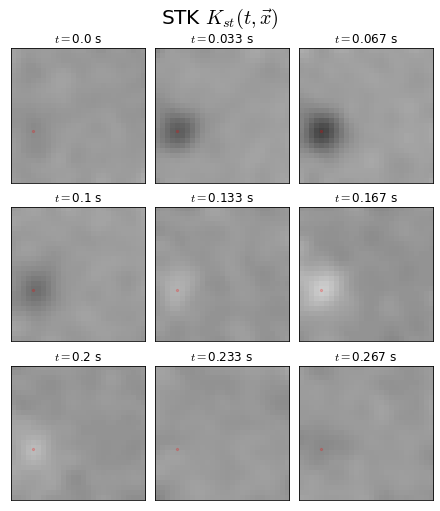

In [15]:
fig, ax = plt.subplots(3,3, constrained_layout=True)
for i in range(9):
    ax.flatten()[i].imshow(STK[i,:,:,cn-1], **imshowdict)
    ax.flatten()[i].set_title(r'$t=$'+str(1*np.round((i)/30, 3))+' s')
    ax.flatten()[i].axes.xaxis.set_visible(False)
    ax.flatten()[i].axes.yaxis.set_visible(False)
    ax.flatten()[i].scatter(centerx,centery, c = 'r', s = 5, alpha = 0.2)
# fig.tight_layout()
fig.suptitle(r'STK $K_{st}(t,\vec{x})$', fontsize=20)
fig.set_size_inches(6,7)

fig.savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\R\\real_STK.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)

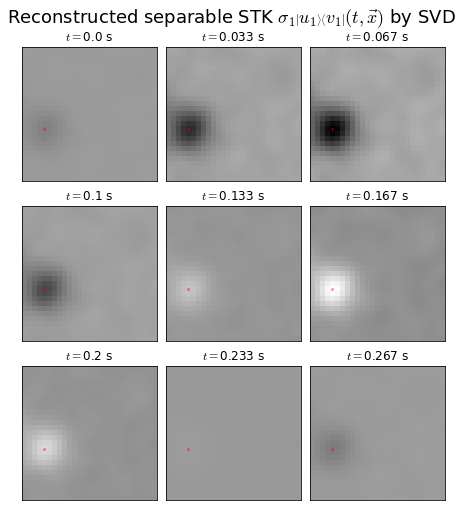

In [16]:
fig, ax = plt.subplots(3,3, constrained_layout=True)
for i in range(9):
    ax.flatten()[i].imshow(VT[0,:].reshape((27,27)) * U[i,0], **imshowdict)
    ax.flatten()[i].set_title(r'$t=$'+str(1*np.round((i)/30, 3))+' s')
    ax.flatten()[i].axes.xaxis.set_visible(False)
    ax.flatten()[i].axes.yaxis.set_visible(False)
    ax.flatten()[i].scatter(centerx,centery, c = 'r', s = 5, alpha = 0.3)
# fig.tight_layout()
fig.suptitle(r'Reconstructed separable STK $\sigma_1 \left| u_1 \right\rangle \left\langle {v_1} \right|(t,\vec{x})$ by SVD', fontsize=18)
fig.set_size_inches(6,7)

fig.savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\R\\real_SeSTK.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)